<a href="https://colab.research.google.com/github/boriphat12/Student-Success-Factor-Analysis/blob/main/Student_Success_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/StudentPerformanceFactors.csv')
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [49]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


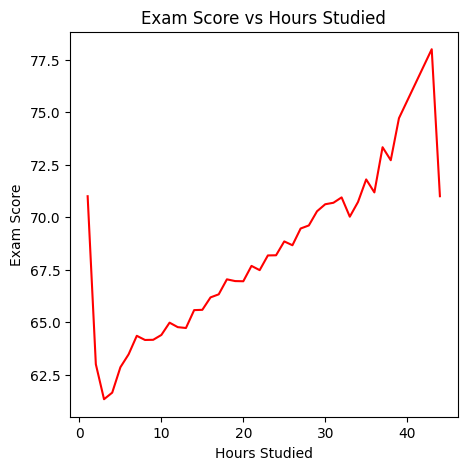

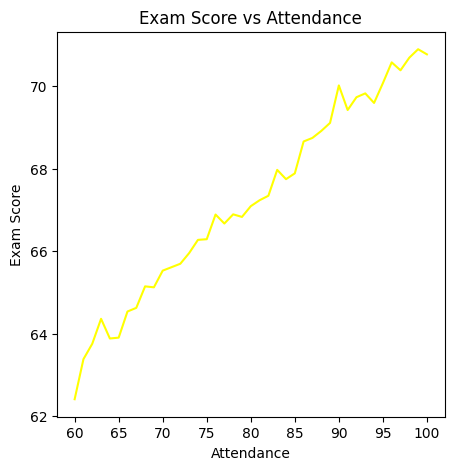

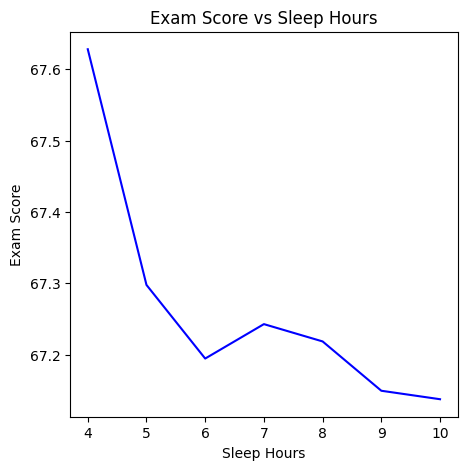

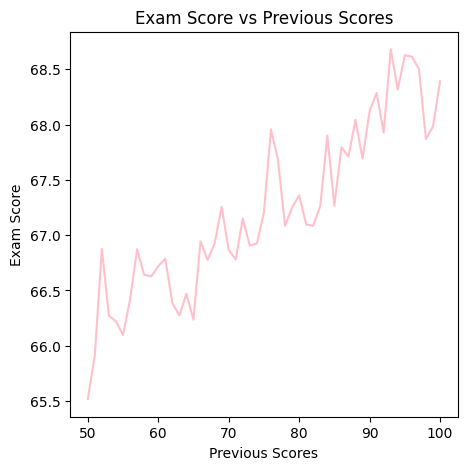

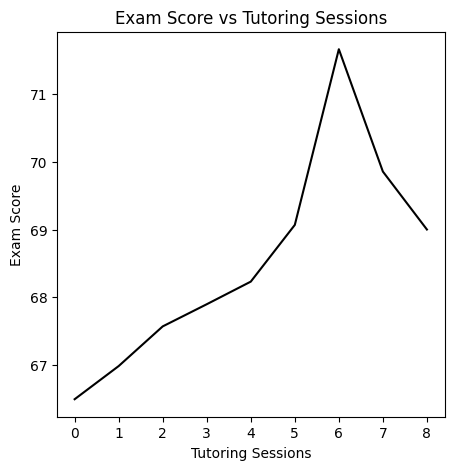

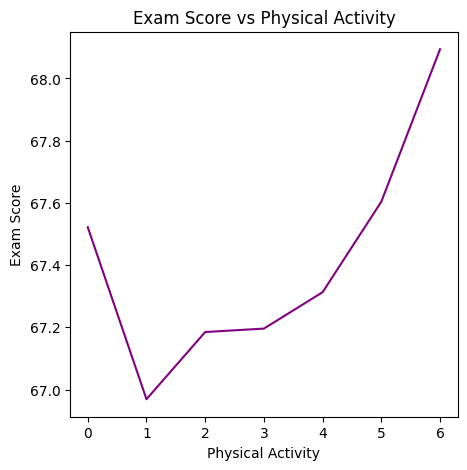

In [43]:
import matplotlib.pyplot as plt

plots = [
    ("Hours_Studied", "red", "Hours Studied"),
    ("Attendance", "yellow", "Attendance"),
    ("Sleep_Hours", "blue", "Sleep Hours"),
    ("Previous_Scores", "pink", "Previous Scores"),
    ("Tutoring_Sessions", "black", "Tutoring Sessions"),
    ("Physical_Activity", "purple", "Physical Activity"),
]
y_col = 'Exam_Score'
ylabel = 'Exam Score'
# Loop through each config and create plots automatically
for x_col, color, xlabel in plots:
    fig, ax = plt.subplots(figsize=(5, 5))
    avg = data.groupby(x_col)[y_col].mean()
    ax.plot(avg.index, avg, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{ylabel} vs {xlabel}")
    plt.show()


In [44]:
data['Hours_Studied'].describe()

,Hours_Studied
count,6607.000000
mean,19.975329
std,5.990594
min,1.000000
25%,16.000000
50%,20.000000
75%,24.000000
max,44.000000


**Graph analysis**

*   In Hours studied graph, There are some unusual data at the beginning and end of data. These might present students who are very smart or have already learnt the content before class, so they didn't need to spend much time studying
*   In the Physical Activity graph, there may also be outliers at the beginning, or perhaps those students just prefer not to exercise and focus only on studying.
*   There are some unusual data in the graph, so I have to clean the data before using it.


